In [2]:
# library imports
import re
import os
import pandas as pd
import matplotlib.pyplot as plt 

# Bestbuy specifics
import bby
import bby.util as ut

from bby.util import clean_doc, tb_enrich, nps_cleanstring
from bby.util import lemma_remove_stopwords, get_wordnet_pos, nps_lemmatise
null_str = "xyxyxz"


In [3]:
# create directories for train/test split of nps data in the format needed by
# keras read_text_dataset
#
import os
import shutil
import numpy as np

def write_NPS_text_dataset(input_filename, rootpath='npsdata', frac=0.1):
    curr_dir = os.getcwd()
    data_dir = "/users/suchanek/repos/npsml/data/clean"
    os.chdir(data_dir)
    class_list = ['detractor', 'passive', 'promoter']

    # try to read the input file
    try:
        os.path.exists(input_filename)
    except OSError as error:
        print(error)
        print(f'Cant read input file {input_filename}. Fatal, exiting')
        return
    
    NPS_df = pd.read_csv(input_filename, index_col='respid2')
    # make the train and test subdirs for trainpath and testpath
    trainpath = os.path.join(rootpath,'train')
    testpath = os.path.join(rootpath,'test')
    # print(f'train: {trainpath}, test: {testpath}')

    # remove the entire tree first
    try:
        os.chdir(data_dir)
        shutil.rmtree(rootpath)
    except OSError as error:
        print(error)

    try: 
        os.makedirs(trainpath) 
    except OSError as error: 
        print(error)  

    try: 
        os.makedirs(testpath) 
    except OSError as error: 
        print(error)  
    
    # now make the class subdirectories for training and testing
    os.chdir(data_dir)
    os.chdir(trainpath)
    for cls in class_list:
        os.mkdir(cls)
    
    os.chdir(data_dir)
    os.chdir(testpath)
    for cls in class_list:
        os.mkdir(cls)
    
    prom_list_mask = NPS_df['NPS_Code'] == 2
    pass_list_mask = NPS_df['NPS_Code'] == 1
    det_list_mask = NPS_df['NPS_Code'] == 0

    prom_list = NPS_df[prom_list_mask]
    pass_list = NPS_df[pass_list_mask]
    det_list = NPS_df[det_list_mask]

    prom_list_len = prom_list.shape[0]
    pass_list_len = pass_list.shape[0]
    det_list_len = det_list.shape[0]

    prom_sample_size = int(np.round(prom_list_len * frac))
    pass_sample_size = int(np.round(pass_list_len * frac))
    det_sample_size = int(np.round(det_list_len * frac))

    # these subsets represent the test subset
    prom_list2 = prom_list.sample(prom_sample_size)
    pass_list2 = pass_list.sample(pass_list_len)
    det_list2 = det_list.sample(det_list_len)

    prom_list_train = prom_list[~prom_list.apply(tuple,1).isin(prom_list2.apply(tuple, 1))]
    pass_list_train = pass_list[~pass_list.apply(tuple,1).isin(pass_list2.apply(tuple, 1))]
    det_list_train = prom_list[~det_list.apply(tuple,1).isin(det_list2.apply(tuple, 1))]

    print(f'Promoters:')
    print(f'Training size: {prom_list_train.shape[0]}')
    print(f'Testing size {prom_list2.shape[0]}')
    print(f'Original size: {prom_list.shape[0]}')
        
    print(f'Passives:')
    print(f'Training size: {pass_list_train.shape[0]}')
    print(f'Testing size {pass_list2.shape[0]}')
    print(f'Original size: {pass_list.shape[0]}')
    
    print(f'Detractors:')
    print(f'Training size: {det_list_train.shape[0]}')
    print(f'Testing size {det_list2.shape[0]}')
    print(f'Original size: {det_list.shape[0]}')
    
    
    # Checking balance of target classes after equalization
    sentiments = list(NPS_df["NPS® Breakdown"].unique())
    sentiment_nums = [len(NPS_df[NPS_df["NPS® Breakdown"] == sentiment]) / len(NPS_df) for sentiment in sentiments]

    print (f'After redistribution: Promoters: {prom_sample_size}, Passives: {pass_list_len}, Detractors: {det_list_len}')
    plt.bar(sentiments, sentiment_nums)
    os.chdir(curr_dir)
    return
    

In [4]:
# print(f'current: {os.getcwd()}')
# os.listdir()

Training size: 9116
Testing size 1013
Original size: 10131
After redistribution: Promoters: 1013, Passives: 8881, Detractors: 11381


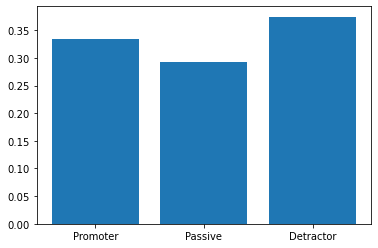

In [5]:
os.chdir('/users/suchanek/repos/npsML/data/clean')
os.listdir()
write_NPS_text_dataset('NPS_NATL_subset.csv')